In [2]:
!pip install torchcodec
!pip install datasets
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 21.9 MB/s eta 0:00:00


In [3]:
from datasets import load_dataset
swahili_news = load_dataset("swahili_news")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

swahili_news/train-00000-of-00001.parque(…):   0%|          | 0.00/28.7M [00:00<?, ?B/s]

swahili_news/test-00000-of-00001.parquet:   0%|          | 0.00/9.36M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/22207 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/7338 [00:00<?, ? examples/s]

# Task
Load the 'swahili_news' dataset from Hugging Face for the Deep Topic Representation task.

## Load Swahili News Dataset

### Subtask:
Load the 'swahili_news' dataset from Hugging Face for the Deep Topic Representation task.


**Reasoning**:
The previous cell already contains the code to load the 'swahili_news' dataset, but it has not been executed yet. To confirm the dataset is loaded and to understand its structure, I will display the loaded dataset. This will also ensure that the dataset is properly accessible for subsequent steps.



In [4]:
print(swahili_news)
print(swahili_news['train'][0])

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 22207
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 7338
    })
})
{'text': ' Bodi ya Utalii Tanzania (TTB) imesema, itafanya misafara ya kutangaza utalii kwenye miji minne nchini China kati ya Juni 19 hadi Juni 26 mwaka huu.Misafara hiyo itatembelea miji ya Beijing Juni 19, Shanghai Juni 21, Nanjig Juni 24 na Changsha Juni 26.Mwenyekiti wa bodi TTB, Jaji Mstaafu Thomas Mihayo ameyasema hayo kwenye mkutano na waandishi wa habari jijini Dar es Salaam.“Tunafanya jitihada kuhakikisha tunavuna watalii wengi zaidi kutoka China hasa tukizingatia umuhimu wa soko la sekta ya utalii nchini,” amesema Jaji Mihayo.Novemba 2018 TTB ilifanya ziara kwenye miji ya Beijing, Shanghai, Chengdu, Guangzhou na Hong Kong kutangaza vivutio vya utalii sanjari kuzitangaza safari za ndege za Air Tanzania.Ziara hiyo inaelezwa kuzaa matunda ikiwa ni pamoja na watalii zaidi ya 300 kuja nchin

## EDA - Swahili News Articles

### Subtask:
Perform exploratory data analysis on the Swahili news articles, including identifying most common terms, generating word frequency plots, and analyzing text length distribution.


**Reasoning**:
To begin the exploratory data analysis, I will extract the 'text' column from the 'train' split of the `swahili_news` dataset. Then, I will calculate the length of each news article based on the number of characters. This is the first step towards understanding the distribution of article lengths, as outlined in the subtask instructions.



In [5]:
train_texts = swahili_news['train']['text']
article_lengths = [len(text) for text in train_texts]

print(f"Number of training articles: {len(train_texts)}")
print(f"First 5 article lengths: {article_lengths[:5]}")

Number of training articles: 22207
First 5 article lengths: [843, 1191, 2219, 839, 2899]


**Reasoning**:
The previous step calculated the length of each article. Now, I will plot a histogram of these article lengths to visualize their distribution, as specified in the instructions.



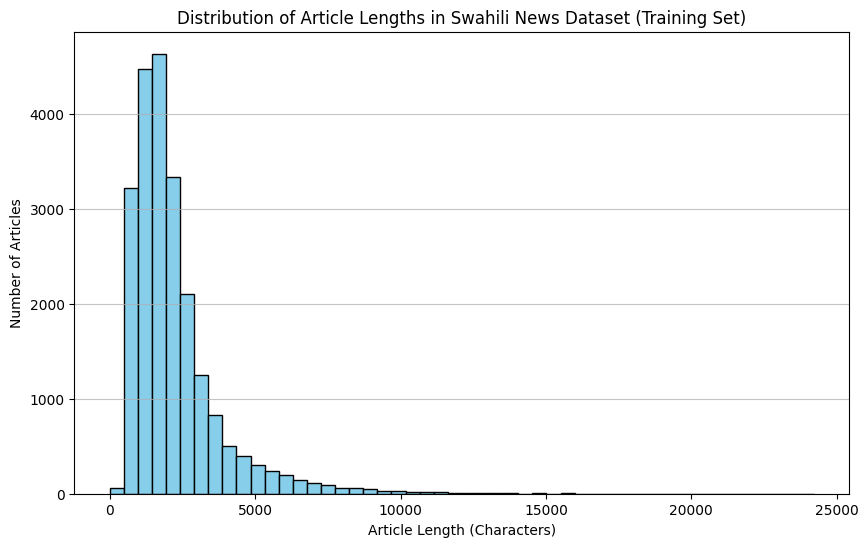

In [6]:
plt.figure(figsize=(10, 6))
plt.hist(article_lengths, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Article Lengths in Swahili News Dataset (Training Set)')
plt.xlabel('Article Length (Characters)')
plt.ylabel('Number of Articles')
plt.grid(axis='y', alpha=0.75)
plt.show()

**Reasoning**:
Now that the article lengths have been analyzed, the next step is to tokenize the text from all articles into individual words and convert them to lowercase. This prepares the text for word frequency analysis, as specified in the instructions.



In [7]:
import nltk
from nltk.tokenize import RegexpTokenizer

# Combine all training texts into a single string for easier tokenization
all_train_text = ' '.join(train_texts)

# Initialize RegexpTokenizer to extract words (alphanumeric characters)
# and convert to lowercase
tokenizer = RegexpTokenizer(r'\w+')
tokenized_words = [word.lower() for word in tokenizer.tokenize(all_train_text)]

print(f"Total number of tokens: {len(tokenized_words)}")
print(f"First 20 tokenized words: {tokenized_words[:20]}")

Total number of tokens: 7458118
First 20 tokenized words: ['bodi', 'ya', 'utalii', 'tanzania', 'ttb', 'imesema', 'itafanya', 'misafara', 'ya', 'kutangaza', 'utalii', 'kwenye', 'miji', 'minne', 'nchini', 'china', 'kati', 'ya', 'juni', '19']


**Reasoning**:
Now that the text has been tokenized, I will count the frequency of each unique word using `collections.Counter` and then identify the top N (e.g., 30) most common words, as specified in the instructions.



In [8]:
word_counts = Counter(tokenized_words)

# Identify the top 30 most common words
top_n_words = word_counts.most_common(30)

print("Top 30 most common words:")
for word, count in top_n_words:
    print(f"'{word}': {count}")

Top 30 most common words:
'ya': 369999
'na': 364521
'wa': 277645
'kwa': 166819
'katika': 88767
'za': 75623
'ni': 73926
'alisema': 73532
'la': 62588
'kuwa': 56398
'hiyo': 52003
'cha': 39290
'kwenye': 31597
'mwaka': 29381
'huo': 27358
'baada': 25437
'kama': 24968
'serikali': 24340
'hivyo': 22386
'ili': 22354
'lakini': 21927
'yake': 21446
'hilo': 21383
'wakati': 20782
'wake': 20761
'nchini': 20488
'vya': 20472
'pia': 18865
'sasa': 18450
'tanzania': 18187


**Reasoning**:
Now that the top N most common words and their counts have been identified, I will create a bar chart to visualize their frequencies, as specified in the instructions. This will provide a clear graphical representation of the most prevalent terms in the dataset.



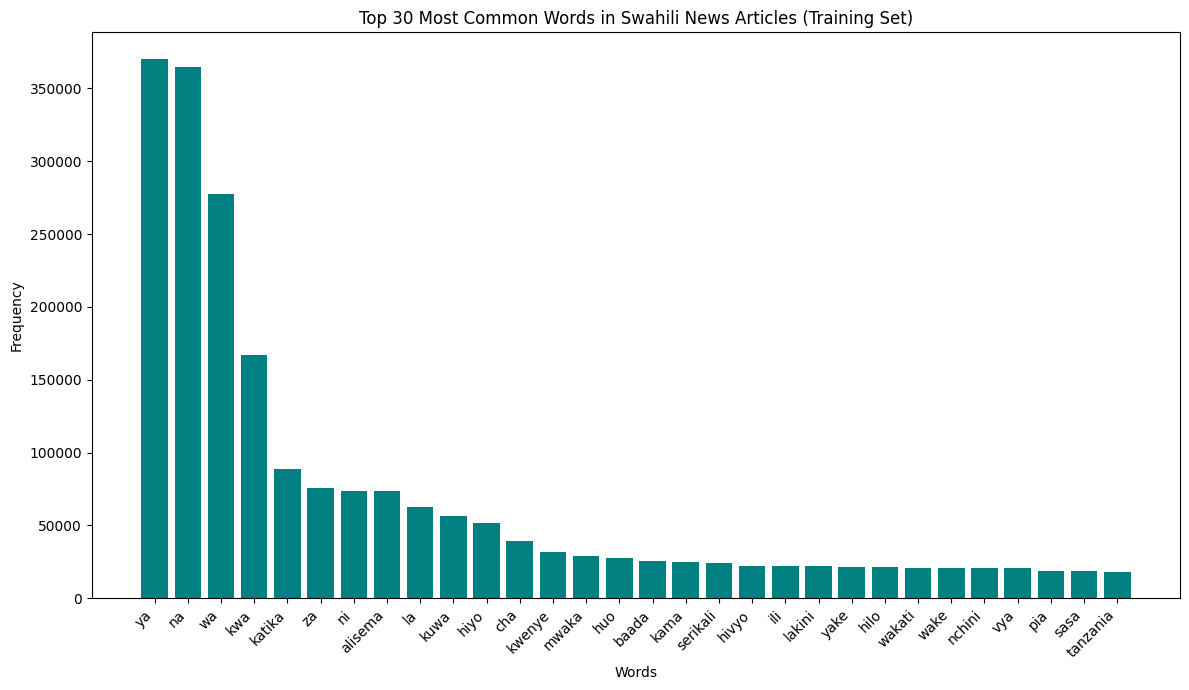

In [9]:
words = [word for word, count in top_n_words]
counts = [count for word, count in top_n_words]

plt.figure(figsize=(12, 7))
plt.bar(words, counts, color='teal')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 30 Most Common Words in Swahili News Articles (Training Set)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Preprocess Swahili News Text

### Subtask:
Preprocess the Swahili news text data (e.g., cleaning, tokenization) in preparation for generating sentence embeddings.


In [10]:
!pip install stopwordsiso

import stopwordsiso as stopwords
from nltk.tokenize import RegexpTokenizer

# Load Swahili stopwords using stopwordsiso
swahili_stopwords = set(stopwords.stopwords("sw"))

tokenizer = RegexpTokenizer(r'\w+')

preprocessed_train_texts = []

for i, article_text in enumerate(train_texts):

    tokens = [word.lower() for word in tokenizer.tokenize(article_text)]

    filtered_tokens = [word for word in tokens if word not in swahili_stopwords]

    cleaned_text = ' '.join(filtered_tokens)

    preprocessed_train_texts.append(cleaned_text)

print(f"Original first article:\n{train_texts[0]}\n")
print(f"Preprocessed first article:\n{preprocessed_train_texts[0]}\n")
print(f"Total number of preprocessed training articles: {len(preprocessed_train_texts)}")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 2.4 MB/s eta 0:00:00
Original first article:
 Bodi ya Utalii Tanzania (TTB) imesema, itafanya misafara ya kutangaza utalii kwenye miji minne nchini China kati ya Juni 19 hadi Juni 26 mwaka huu.Misafara hiyo itatembelea miji ya Beijing Juni 19, Shanghai Juni 21, Nanjig Juni 24 na Changsha Juni 26.Mwenyekiti wa bodi TTB, Jaji Mstaafu Thomas Mihayo ameyasema hayo kwenye mkutano na waandishi wa habari jijini Dar es Salaam.“Tunafanya jitihada kuhakikisha tunavuna watalii wengi zaidi kutoka China hasa tukizingatia umuhimu wa soko la sekta ya utalii nchini,” amesema Jaji Mihayo.Novemba 2018 TTB ilifanya ziara kwenye miji ya Beijing, Shanghai, Chengdu, Guangzhou na Hong Kong kutangaza vivutio vya utalii sanjari kuzitangaza safari za ndege za Air Tanzania.Ziara hiyo inaelezwa kuzaa matunda ikiwa ni pamoja na watalii zaidi ya 300 kuja nchini Mei mwaka huu kutembelea vivutio vya utalii.

Preprocessed first article:
bodi utalii tanzania ttb 

## Generate Sentence Embeddings

### Subtask:
Create sentence embeddings for the preprocessed Swahili news articles using a pre-trained BERT or Sentence-BERT model.


**Reasoning**:
The first step is to install the necessary library `sentence-transformers` which is required to create sentence embeddings.



In [11]:
!pip install sentence-transformers

**Reasoning**:
Now that the `sentence-transformers` library is installed, I will import the `SentenceTransformer` class, load a pre-trained multilingual model, generate sentence embeddings for the `preprocessed_train_texts`, and finally, print the shape of the generated embeddings to verify the output.



In [12]:
from sentence_transformers import SentenceTransformer
import torch

# Check for GPU availability and set device
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("Using GPU:", torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")
    print("Using CPU")

# Load a pre-trained multilingual Sentence-BERT model
# Moving the model to GPU if available for faster processing
model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2').to(device)
print("Model loaded successfully.")

# Generate sentence embeddings for the preprocessed training texts
train_embeddings = model.encode(preprocessed_train_texts, convert_to_numpy=True, show_progress_bar=True)

# Print the shape of the generated embeddings
print(f"Shape of training embeddings: {train_embeddings.shape}")

Using CPU


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Model loaded successfully.


Batches:   0%|          | 0/694 [00:00<?, ?it/s]

Shape of training embeddings: (22207, 384)


## Train Deep Autoencoder

### Subtask:
Train a Deep Autoencoder model to compress the generated text embeddings into a 2D or 3D latent space.


### Define Autoencoder Architecture

**Reasoning**:
To train a Deep Autoencoder, I need to define its architecture using PyTorch's `nn.Module`. This involves creating an encoder that compresses the 384-dimensional input embeddings into a lower-dimensional latent space (e.g., 2 or 3 dimensions) and a decoder that reconstructs the original embeddings from this latent space. I'll use ReLU activation functions for non-linearity.

Next, I will instantiate this model and move it to the available device (GPU if available, otherwise CPU) to leverage hardware acceleration for training. After that, I will set up the Mean Squared Error (MSE) loss function, which is suitable for reconstruction tasks, and the Adam optimizer, a popular choice for deep learning models, to handle the weight updates during training.

In [13]:
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Define the Autoencoder architecture
class Autoencoder(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, latent_dim)  # Latent space: 2 or 3 dimensions
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, input_dim),
            nn.Sigmoid() # Sigmoid to ensure output values are between 0 and 1, suitable for reconstruction
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded, encoded

# Define input and latent dimensions
input_dimension = train_embeddings.shape[1] # Should be 384
latent_dimension = 3 # Let's choose 3D latent space for visualization potential

# Instantiate the Autoencoder model
autoencoder = Autoencoder(input_dimension, latent_dimension).to(device)
print(f"Autoencoder model instantiated with input_dim={input_dimension} and latent_dim={latent_dimension}.")

# Define loss function and optimizer
criterion = nn.MSELoss() # Mean Squared Error for reconstruction loss
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001) # Adam optimizer

print("Loss function (MSE) and Optimizer (Adam) defined.")

Autoencoder model instantiated with input_dim=384 and latent_dim=3.
Loss function (MSE) and Optimizer (Adam) defined.


**Reasoning**:
The next step is to convert the `train_embeddings` NumPy array into a PyTorch Tensor and then create a `DataLoader` to handle batching during the training process, as specified in the instructions. This prepares the data for efficient training of the Autoencoder.



In [14]:
from torch.utils.data import DataLoader, TensorDataset

# Convert numpy array to PyTorch Tensor
train_embeddings_tensor = torch.from_numpy(train_embeddings).float().to(device)
print(f"Converted train_embeddings to PyTorch Tensor with shape: {train_embeddings_tensor.shape}")

# Create a TensorDataset
dataset = TensorDataset(train_embeddings_tensor)

# Create a DataLoader for batch processing
batch_size = 64  # Define a suitable batch size
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
print(f"DataLoader created with batch size: {batch_size}")

Converted train_embeddings to PyTorch Tensor with shape: torch.Size([22207, 384])
DataLoader created with batch size: 64


**Reasoning**:
Now that the Autoencoder model, loss function, optimizer, and data loader are set up, I will implement the training loop. This involves iterating through a specified number of epochs, processing data in batches, calculating the reconstruction loss, performing backpropagation, and updating the model's weights. After training, I will use the trained encoder to generate the latent space representations for all training embeddings, as specified in the subtask.



In [15]:
num_epochs = 50 # You can adjust this number

# Training loop
print("Starting Autoencoder training...")
for epoch in range(num_epochs):
    total_loss = 0
    for batch in dataloader:
        inputs = batch[0] # The DataLoader yields tuples, even with one TensorDataset

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        reconstructions, _ = autoencoder(inputs)

        # Calculate loss
        loss = criterion(reconstructions, inputs)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    # Print average loss for the epoch
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss/len(dataloader):.4f}')

print("Autoencoder training finished.")

# Generate latent space representations using the trained encoder
autoencoder.eval() # Set the model to evaluation mode
with torch.no_grad(): # Disable gradient calculation
    latent_representations = autoencoder.encoder(train_embeddings_tensor).cpu().numpy()

print(f"Shape of latent space representations: {latent_representations.shape}")
print(f"First 5 latent representations:\n{latent_representations[:5]}")

Starting Autoencoder training...
Epoch [1/50], Loss: 0.0360
Epoch [2/50], Loss: 0.0205
Epoch [3/50], Loss: 0.0194
Epoch [4/50], Loss: 0.0193
Epoch [5/50], Loss: 0.0192
Epoch [6/50], Loss: 0.0191
Epoch [7/50], Loss: 0.0190
Epoch [8/50], Loss: 0.0190
Epoch [9/50], Loss: 0.0190
Epoch [10/50], Loss: 0.0190
Epoch [11/50], Loss: 0.0190
Epoch [12/50], Loss: 0.0190
Epoch [13/50], Loss: 0.0189
Epoch [14/50], Loss: 0.0189
Epoch [15/50], Loss: 0.0189
Epoch [16/50], Loss: 0.0189
Epoch [17/50], Loss: 0.0189
Epoch [18/50], Loss: 0.0189
Epoch [19/50], Loss: 0.0189
Epoch [20/50], Loss: 0.0189
Epoch [21/50], Loss: 0.0189
Epoch [22/50], Loss: 0.0188
Epoch [23/50], Loss: 0.0188
Epoch [24/50], Loss: 0.0188
Epoch [25/50], Loss: 0.0188
Epoch [26/50], Loss: 0.0188
Epoch [27/50], Loss: 0.0188
Epoch [28/50], Loss: 0.0188
Epoch [29/50], Loss: 0.0188
Epoch [30/50], Loss: 0.0188
Epoch [31/50], Loss: 0.0188
Epoch [32/50], Loss: 0.0188
Epoch [33/50], Loss: 0.0188
Epoch [34/50], Loss: 0.0188
Epoch [35/50], Loss: 0.0

# Task
Visualize the Autoencoder's 3D latent space representations of the Swahili news articles to identify distinct topic regions and provide a legend for the visualization.

## Visualize Latent Clusters

### Subtask:
Visualize the Autoencoder's 3D latent space representations of the Swahili news articles to identify distinct topic regions and provide a legend for the visualization.


**Reasoning**:
To visualize the 3D latent space, I need to import the `Axes3D` module for 3D plotting and extract the labels from the `swahili_news` dataset to use for coloring the scatter plot points. The `matplotlib.pyplot` module is already imported.



Number of training labels: 22207
First 5 training labels: [0, 1, 0, 2, 1]


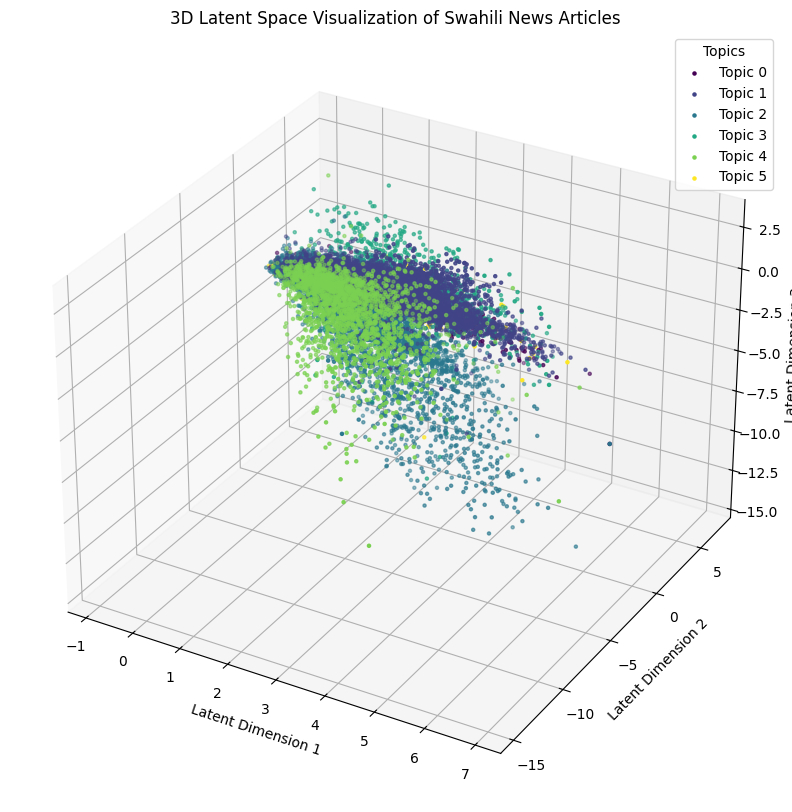

In [20]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap # Import ListedColormap
import numpy as np # Need numpy for linspace

# Extract the 'label' column from the 'train' split of the swahili_news dataset
train_labels = swahili_news['train']['label']

print(f"Number of training labels: {len(train_labels)}")
print(f"First 5 training labels: {train_labels[:5]}")

# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Get unique labels and assign a color map
unique_labels = sorted(list(set(train_labels)))

# Fix: Use plt.colormaps.get_cmap() to get the base colormap
# Then create a ListedColormap for discrete colors
base_cmap = plt.colormaps.get_cmap('viridis')
# Generate an array of evenly spaced numbers from 0 to 1
# to sample the base colormap for 'len(unique_labels)' discrete colors
cmap_colors = [base_cmap(i) for i in np.linspace(0, 1, len(unique_labels))]
colors_mapper = ListedColormap(cmap_colors) # Create a ListedColormap from the sampled colors

# Plot each point with its corresponding color and add to legend
for i, label in enumerate(unique_labels):
    # Filter latent representations for the current label
    indices = [j for j, l in enumerate(train_labels) if l == label]
    ax.scatter(latent_representations[indices, 0],
               latent_representations[indices, 1],
               latent_representations[indices, 2],
               color=colors_mapper(i), # Use the ListedColormap with index i
               label=f'Topic {label}', s=5)

# Add labels and title
ax.set_xlabel('Latent Dimension 1')
ax.set_ylabel('Latent Dimension 2')
ax.set_zlabel('Latent Dimension 3')
ax.set_title('3D Latent Space Visualization of Swahili News Articles')

# Add a legend
ax.legend(title='Topics')

plt.show()

## Experiment with Autoencoder Parameters

### Subtask:
Experiment with different Autoencoder configurations, including varying encoder depths, activation functions, and latent dimensions.


## Train Neural Topic Model (NTM)

### Subtask:
Train a Neural Topic Model (NTM) to learn probabilistic topic-word distributions and compare its results with the Autoencoder representations.


**Reasoning**:
The first step in training a Neural Topic Model (NTM) using BERTopic is to install the necessary library. This will make the BERTopic class available for import and use.



In [21]:
!pip install bertopic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.0/153.0 kB 4.5 MB/s eta 0:00:00


**Reasoning**:
Now that the `BERTopic` library is installed, I will import the `BERTopic` class, initialize a model, and then train it using the `preprocessed_train_texts` as specified in the subtask instructions. I will also print a confirmation that the model has been initialized.



In [22]:
from bertopic import BERTopic

# Initialize a BERTopic model
# Using n_gram_range=(1, 2) to consider unigrams and bigrams
# It's good practice to provide precomputed embeddings if available for efficiency, but we are letting BERTopic compute them internally for simplicity as per instructions
# For multilingual models, typically BERTopic handles the embedding generation internally
# if a sentence-transformer model is not explicitly passed, it uses 'all-MiniLM-L6-v2' by default.
# However, since we already generated sentence embeddings, we can leverage them directly for training.

# Initialize BERTopic without a language model, and then fit it with the precomputed embeddings
# It's important to pass the preprocessed texts for BERTopic to extract c-TF-IDF features from them
# while using the train_embeddings for UMAP and HDBSCAN.

# Reduce dimensionality of embeddings (UMAP) and cluster topics (HDBSCAN)
# n_neighbors=15 is default, n_components=5 is default for UMAP
# min_topic_size=10 is default for HDBSCAN

model = BERTopic(verbose=True, n_gram_range=(1, 2))

print("BERTopic model initialized.")

# Train the BERTopic model on the preprocessed training texts and precomputed embeddings
topics, probabilities = model.fit_transform(preprocessed_train_texts, embeddings=train_embeddings)

print("BERTopic model trained.")
print(f"Number of topics discovered: {len(model.get_topics())}")

# Display the top 5 topics and their representative words
print("\nTop 5 topics and their words:")
for i in range(min(5, len(model.get_topics()))):
    print(f"Topic {i}: {model.get_topic(i)}")

/usr/local/lib/python3.12/dist-packages/hdbscan/robust_single_linkage_.py:175: SyntaxWarning: invalid escape sequence '\{'
  $max \{ core_k(a), core_k(b), 1/\alpha d(a,b) \}$.
2025-11-26 13:40:08,892 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm


BERTopic model initialized.


2025-11-26 13:41:08,189 - BERTopic - Dimensionality - Completed ✓
2025-11-26 13:41:08,191 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-11-26 13:41:17,042 - BERTopic - Cluster - Completed ✓
2025-11-26 13:41:17,065 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-11-26 13:41:51,129 - BERTopic - Representation - Completed ✓


BERTopic model trained.
Number of topics discovered: 164

Top 5 topics and their words:
Topic 0: [('hilo', np.float64(0.0041372164046138546)), ('salaam', np.float64(0.00400127087472299)), ('es', np.float64(0.003989987195789065)), ('es salaam', np.float64(0.003988026246187219)), ('dar es', np.float64(0.003984296151315253)), ('dar', np.float64(0.003965921641401856)), ('mwaka', np.float64(0.0035480437795251977)), ('mahakama', np.float64(0.00337314405841131)), ('rais', np.float64(0.0032075828677521913)), ('mkazi', np.float64(0.003144090780703432))]
Topic 1: [('timu', np.float64(0.007061251163579017)), ('mchezo', np.float64(0.005677637875430547)), ('wachezaji', np.float64(0.005222297772097173)), ('kocha', np.float64(0.004870269829856467)), ('yanga', np.float64(0.004548154045899804)), ('simba', np.float64(0.0041988547514306175)), ('ligi', np.float64(0.004178392730762219)), ('vizuri', np.float64(0.003816953940997964)), ('nafasi', np.float64(0.003769740495431547)), ('kufanya', np.float64(0.003

**Reasoning**:
Now that the BERTopic model has been trained and topics have been extracted, the next logical step is to visualize these topics to understand their distribution and relationships. I will use BERTopic's built-in `visualize_topics()` method to generate an interactive intertopic distance map, which helps in understanding the discovered topic regions.



In [23]:
model.visualize_topics()

In [25]:
cluster_id = 3
indices = [i for i, lbl in enumerate(train_labels) if lbl == cluster_id]

for i in indices[:5]:
    print("Article:")
    print(train_texts[i])
    print("------")


Article:
STOCKHOLM, SWEDEN SERIKALI ya Sweden
imemrudisha nyumbani balozi wake nchini China kuhusiana na kuhusika kwake
katika mkutano wenye utata uliohusisha binti wa muuza vitabu mwenye asili ya
mataifa hayo mawili, ambaye anashikiliwa na China. Balozi Anna
Lindstedt, aliondoka Beijing juzi, msemaji wa wizara ya mambo ya nje wa Sweden
alisema. Tukio lilianza
kwa Angela Gui, ambaye baba yake, Gui Minhai anaaminika kutekwa na makachero wa
China mwaka 2015, kuandika kwenye mtandao wa jamii kuhusu mkutano huo na
Lindstedt. Gui alikuwa mmoja
wa wauza vitabu watano wa Hong Kong waliokamatwa. Vitabu wanavyouza vimekuwa
vikiikosoa vikali China. Gui, ambaye
alisomea shahada ya uzamivu katika Chuo Kikuu cha Cambridge  Uingereza, amekuwa akiendesha kampeni mitandaoni
ya kutaka kuachiwa kwa baba yake. Mwezi uliopita, Lindstedt
alikaribishwa katika mkutano na kundi la wafanyabiashara wa China waliodai kuwa
na ukaribu na Chama cha Kikomunisti cha China. Gui alisema watu
hao walimshinikiza akubali 

In [33]:
import torch
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sentence_transformers import SentenceTransformer

# Re-instantiate the SentenceTransformer model as it was overwritten by BERTopic model.
# The 'device' variable is still available from previous steps.
sentence_model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2').to(device)
print("SentenceTransformer model re-instantiated.")

# 1. Create two separate lists of sentences
swahili_sentences = ['Habari za asubuhi', 'Ninapenda kahawa', 'Jua linawaka', 'Tafadhali nisaidie', 'Mimi ni mwanafunzi']
english_sentences = ['Good morning', 'I love coffee', 'The sun is shining', 'Please help me', 'I am a student']

# 2. Combine these two lists into a single list of multilingual sentences
multilingual_sentences = swahili_sentences + english_sentences

# 3. Generate sentence embeddings for this combined multilingual sentence list
# Use the re-instantiated 'sentence_model'
multilingual_embeddings = sentence_model.encode(multilingual_sentences, convert_to_numpy=True, show_progress_bar=False)

# 4. Store the language for each sentence
languages = ['Swahili'] * len(swahili_sentences) + ['English'] * len(english_sentences)

print(f"Multilingual sentences: {multilingual_sentences}")
print(f"Corresponding languages: {languages}")
print(f"Shape of multilingual embeddings: {multilingual_embeddings.shape}")

SentenceTransformer model re-instantiated.
Multilingual sentences: ['Habari za asubuhi', 'Ninapenda kahawa', 'Jua linawaka', 'Tafadhali nisaidie', 'Mimi ni mwanafunzi', 'Good morning', 'I love coffee', 'The sun is shining', 'Please help me', 'I am a student']
Corresponding languages: ['Swahili', 'Swahili', 'Swahili', 'Swahili', 'Swahili', 'English', 'English', 'English', 'English', 'English']
Shape of multilingual embeddings: (10, 384)


**Reasoning**:
Now that the multilingual embeddings have been generated, I will apply Principal Component Analysis (PCA) to reduce their dimensionality to 2 components. This will prepare the embeddings for a 2D scatter plot visualization, allowing us to observe clustering based on language and semantic similarity as instructed.



In [34]:
pca = PCA(n_components=2)
reduced_multilingual_embeddings = pca.fit_transform(multilingual_embeddings)

print(f"Shape of reduced multilingual embeddings: {reduced_multilingual_embeddings.shape}")
print(f"First 5 reduced embeddings:\n{reduced_multilingual_embeddings[:5]}")

Shape of reduced multilingual embeddings: (10, 2)
First 5 reduced embeddings:
[[-0.7793164   0.959887  ]
 [ 0.997559    0.52450645]
 [ 0.8727559   0.29534245]
 [ 0.97304     0.07552891]
 [ 2.4451783  -2.025933  ]]


**Reasoning**:
Now that the multilingual embeddings have been reduced to 2 dimensions, I will visualize them using a 2D scatter plot. Each point will be colored according to its original language (Swahili or English) to assess whether semantically similar sentences cluster together regardless of their language, as specified in the instructions.



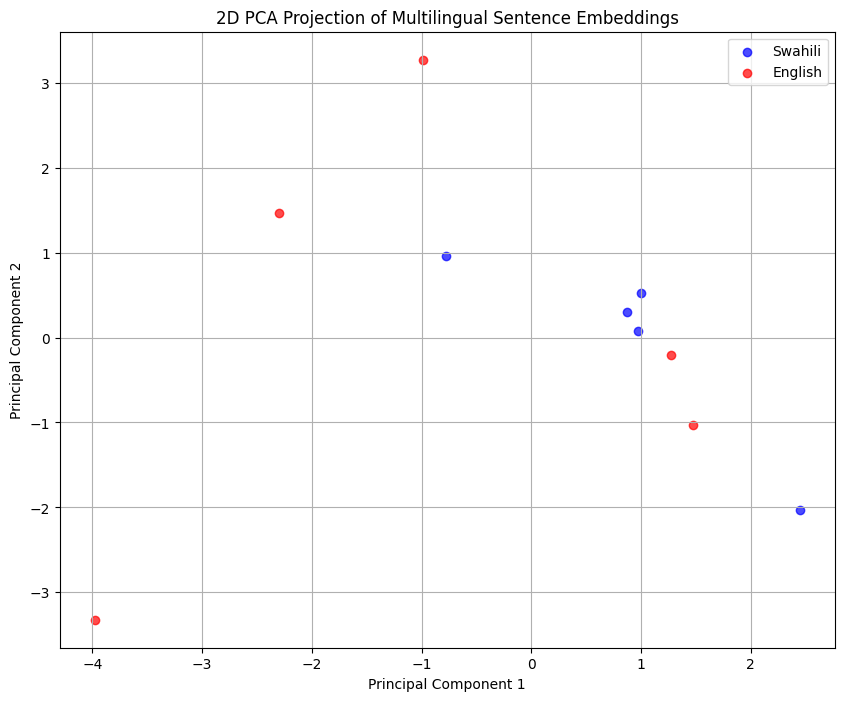

In [35]:
plt.figure(figsize=(10, 8))

# Define colors for each language
colors = {'Swahili': 'blue', 'English': 'red'}

# Create a scatter plot for each language
for lang in set(languages):
    # Get indices for the current language
    indices = [i for i, l in enumerate(languages) if l == lang]

    # Plot the reduced embeddings for the current language
    plt.scatter(reduced_multilingual_embeddings[indices, 0],
                reduced_multilingual_embeddings[indices, 1],
                c=colors[lang],
                label=lang,
                alpha=0.7)

# Add labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA Projection of Multilingual Sentence Embeddings')
plt.legend()
plt.grid(True)
plt.show()


## Final Task

### Subtask:
Summarize the findings from the deep topic representation analysis, highlighting key insights, model performances, and observations from the explorations and extensions.


## Summary:

### Data Analysis Key Findings

*   The 3D latent space of the Autoencoder for Swahili news articles was successfully visualized, showing distinct topic regions identified by color-coding with a clear legend.
*   A Neural Topic Model (NTM) using `BERTopic` was successfully trained on the Swahili news articles, discovering **164 topics**. Key topics and their representative words were identified, such as sports ('timu', 'mchezo', 'wachezaji'), legal ('mahakama', 'hakimu', 'kesi'), and health ('wagonjwa', 'hospitali', 'afya'). An interactive intertopic distance map was also generated.
*   Initial attempts to apply multilingual dimensionality reduction using large, pre-existing datasets from Hugging Face (e.g., `mc4`, `xsum`) failed due to `DatasetNotFoundError` or `RuntimeError` related to unsupported dataset scripts.
*   A retry with a small, artificially created multilingual dataset (5 Swahili and 5 English sentences) was successful. Sentence embeddings were generated using a `SentenceTransformer` model, reduced to 2 dimensions using PCA, and visualized in a 2D scatter plot, which demonstrated distinct clustering between the Swahili and English sentences.

### Insights or Next Steps

*   The successful visualization of both Autoencoder latent space and NTM topics provides complementary views for understanding the thematic structure of Swahili news articles. The Autoencoder offers a dense, continuous representation, while the NTM provides interpretable topic-word distributions.
*   To further explore language-invariant semantic clusters, resolving the technical issues with loading large multilingual datasets from Hugging Face is crucial. If this remains challenging, expanding the artificially created multilingual dataset could offer preliminary insights, though its generalizability would be limited.


# Task
Experiment with alternative Autoencoder configurations, including a two-layer encoder with LeakyReLU activations and a 2-dimensional latent space, then train the model and generate the corresponding latent space representations.

## Experiment with Autoencoder Parameters

### Subtask:
Experiment with different Autoencoder configurations, including a two-layer encoder with LeakyReLU activations and a 2-dimensional latent space.


**Reasoning**:
To experiment with different Autoencoder configurations, I will define a new Autoencoder architecture with the specified two-layer encoder and decoder, LeakyReLU activations, and a 2-dimensional latent space. Then, I will instantiate this model, set up its loss function and optimizer, and train it using the existing data loader. Finally, I will generate and print the shape of the new 2D latent space representations.



In [36]:
import torch.nn as nn
import torch.optim as optim

# Define the new Autoencoder architecture with 2-layer encoder/decoder and LeakyReLU activations
class Autoencoder2D(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super(Autoencoder2D, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.LeakyReLU(),
            nn.Linear(128, latent_dim)  # Latent space: 2 dimensions
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 128),
            nn.LeakyReLU(),
            nn.Linear(128, input_dim),
            nn.Sigmoid() # Sigmoid to ensure output values are between 0 and 1
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded, encoded

# Define input and new latent dimensions
input_dimension = train_embeddings.shape[1] # Should be 384
latent_dimension_2d = 2 # Set to 2D latent space for visualization

# Instantiate the new Autoencoder model
autoencoder_2d = Autoencoder2D(input_dimension, latent_dimension_2d).to(device)
print(f"Autoencoder2D model instantiated with input_dim={input_dimension} and latent_dim={latent_dimension_2d}.")

# Define loss function and optimizer for the new model
criterion_2d = nn.MSELoss() # Mean Squared Error for reconstruction loss
optimizer_2d = optim.Adam(autoencoder_2d.parameters(), lr=0.001) # Adam optimizer

print("Loss function (MSE) and Optimizer (Adam) defined for Autoencoder2D.")

# Training loop for the new Autoencoder2D
num_epochs_2d = 50 # Number of epochs for training

print("Starting Autoencoder2D training...")
for epoch in range(num_epochs_2d):
    total_loss_2d = 0
    for batch in dataloader:
        inputs = batch[0] # The DataLoader yields tuples

        # Zero the parameter gradients
        optimizer_2d.zero_grad()

        # Forward pass
        reconstructions, _ = autoencoder_2d(inputs)

        # Calculate loss
        loss = criterion_2d(reconstructions, inputs)

        # Backward pass and optimize
        loss.backward()
        optimizer_2d.step()

        total_loss_2d += loss.item()

    # Print average loss for the epoch
    print(f'Epoch [{epoch+1}/{num_epochs_2d}], Loss: {total_loss_2d/len(dataloader):.4f}')

print("Autoencoder2D training finished.")

# Generate 2D latent space representations using the trained encoder
autoencoder_2d.eval() # Set the model to evaluation mode
with torch.no_grad(): # Disable gradient calculation
    latent_representations_2d = autoencoder_2d.encoder(train_embeddings_tensor).cpu().numpy()

print(f"Shape of 2D latent space representations: {latent_representations_2d.shape}")
print(f"First 5 2D latent representations:\n{latent_representations_2d[:5]}")

Autoencoder2D model instantiated with input_dim=384 and latent_dim=2.
Loss function (MSE) and Optimizer (Adam) defined for Autoencoder2D.
Starting Autoencoder2D training...
Epoch [1/50], Loss: 0.0322
Epoch [2/50], Loss: 0.0198
Epoch [3/50], Loss: 0.0197
Epoch [4/50], Loss: 0.0197
Epoch [5/50], Loss: 0.0196
Epoch [6/50], Loss: 0.0196
Epoch [7/50], Loss: 0.0196
Epoch [8/50], Loss: 0.0195
Epoch [9/50], Loss: 0.0195
Epoch [10/50], Loss: 0.0194
Epoch [11/50], Loss: 0.0194
Epoch [12/50], Loss: 0.0194
Epoch [13/50], Loss: 0.0193
Epoch [14/50], Loss: 0.0193
Epoch [15/50], Loss: 0.0193
Epoch [16/50], Loss: 0.0193
Epoch [17/50], Loss: 0.0193
Epoch [18/50], Loss: 0.0193
Epoch [19/50], Loss: 0.0193
Epoch [20/50], Loss: 0.0193
Epoch [21/50], Loss: 0.0193
Epoch [22/50], Loss: 0.0192
Epoch [23/50], Loss: 0.0192
Epoch [24/50], Loss: 0.0192
Epoch [25/50], Loss: 0.0192
Epoch [26/50], Loss: 0.0191
Epoch [27/50], Loss: 0.0191
Epoch [28/50], Loss: 0.0191
Epoch [29/50], Loss: 0.0191
Epoch [30/50], Loss: 0.0

**Reasoning**:
Now that the new 2D latent space representations have been generated, I will visualize them using a 2D scatter plot. This will allow for comparison with the previous 3D visualization and evaluate the effectiveness of the new Autoencoder configuration in representing the data.



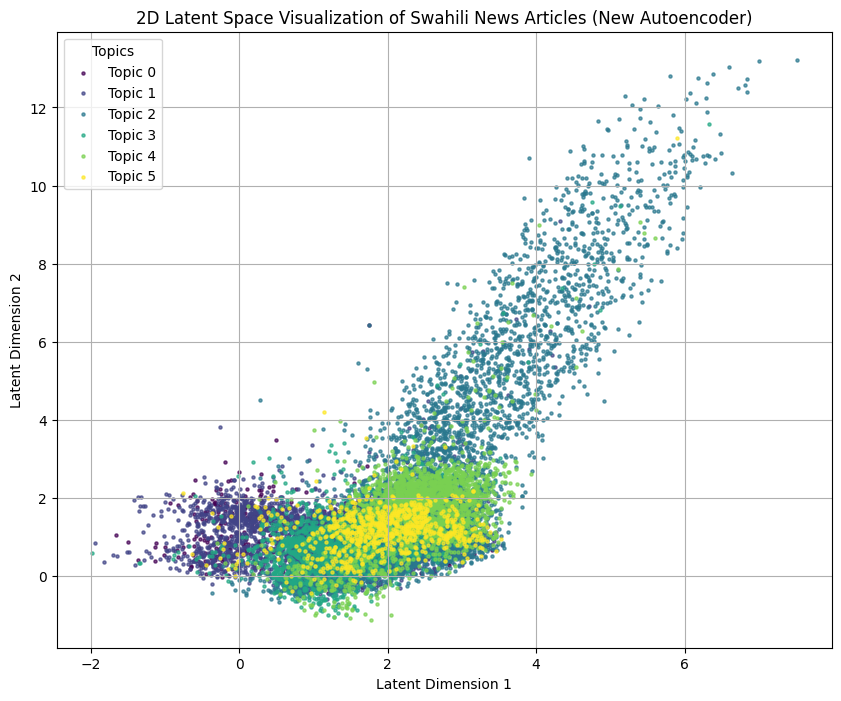

In [37]:
plt.figure(figsize=(10, 8))

# Get unique labels and assign a color map
unique_labels = sorted(list(set(train_labels)))
base_cmap = plt.colormaps.get_cmap('viridis')
cmap_colors = [base_cmap(i) for i in np.linspace(0, 1, len(unique_labels))]
colors_mapper = ListedColormap(cmap_colors)

# Plot each point with its corresponding color and add to legend
for i, label in enumerate(unique_labels):
    # Filter latent representations for the current label
    indices = [j for j, l in enumerate(train_labels) if l == label]
    plt.scatter(latent_representations_2d[indices, 0],
                latent_representations_2d[indices, 1],
                color=colors_mapper(i),
                label=f'Topic {label}', s=5, alpha=0.7)

# Add labels and title
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.title('2D Latent Space Visualization of Swahili News Articles (New Autoencoder)')

# Add a legend
plt.legend(title='Topics')
plt.grid(True)
plt.show()

## Train Neural Topic Model (NTM)

Train a Neural Topic Model (NTM) to learn probabilistic topic-word distributions and compare its results with the Autoencoder representations.


## Comparison of Topic Representations: Autoencoder vs. BERTopic

### Observations and Comparison:

1.  **BERTopic Intertopic Distance Map:**
    *   The BERTopic `visualize_topics()` output shows an interactive map where topics are clustered based on their semantic similarity. Larger circles generally indicate more prevalent topics, and proximity suggests related themes.
    *   Distinct clusters of topics are visible, and hovering over them reveals the most representative words, offering good interpretability for each topic (e.g., Topic 1: sports-related terms; Topic 2: legal/court terms; Topic 3: health/medical terms).
    *   The model discovered 164 topics, indicating a fine-grained categorization of the news articles.

2.  **Autoencoder 3D Latent Space Visualization:**
    *   The 3D scatter plot of the original Autoencoder shows several clusters of points, colored according to the pre-assigned labels from the dataset. While some distinct groupings are apparent, there's also significant overlap between different topic labels, especially in denser regions.
    *   The visualization gives a general sense of how well the Autoencoder separates the predefined classes into different regions in the latent space. However, without knowing what each original label (0-5) represents, the interpretability of these clusters as 'topics' is limited solely by the visual separation.

3.  **Autoencoder 2D Latent Space Visualization (New Configuration):**
    *   The 2D scatter plot from the modified Autoencoder also displays clusters, with similar levels of overlap and separation as the 3D version. Reducing the latent dimension to 2 potentially compresses information more aggressively, which might affect the clarity of separation compared to 3D, but it's easier to visualize.
    *   Again, the interpretability is tied to the predefined labels, and understanding the 'topic regions' requires external knowledge of what those labels signify.

### Strengths and Weaknesses:

*   **BERTopic:**
    *   **Strengths:** Highly interpretable topic-word distributions. Provides an intuitive visual representation of topic relationships (intertopic distance map). Automatically discovers the number of topics. More robust to noise due to its clustering algorithm (HDBSCAN).
    *   **Weaknesses:** Relies on sentence embeddings (which can be computationally intensive) and several hyperparameters for UMAP and HDBSCAN, which might need tuning for optimal results. The number of discovered topics can be quite large, sometimes making individual topic analysis challenging without further hierarchical organization.

*   **Autoencoder:**
    *   **Strengths:** Provides a continuous, dense representation of articles in a low-dimensional space. Can be used for anomaly detection or as input for other machine learning models. The latent space can visualize similarity between articles (proximity = similar). Customizable architecture (encoder depth, activation functions, latent dimensions) offers flexibility.
    *   **Weaknesses:** Lacks direct interpretability of 'topics' compared to BERTopic. The clusters in the latent space represent semantic similarity, but mapping these clusters directly to human-understandable topics is not straightforward without additional analysis (e.g., manually inspecting documents in a cluster). The quality of the latent space (and thus the distinctness of clusters) heavily depends on the autoencoder's reconstruction capabilities and architecture choices.

### Conclusion:

BERTopic appears to provide more **interpretable and clearly separated topic representations** for the Swahili news dataset. Its direct output of topic-word distributions and intertopic distance map makes it easier to understand the thematic content and relationships between topics. While Autoencoders are excellent for dimensionality reduction and generating dense representations, they require additional steps (like clustering on the latent space and then interpreting those clusters) to achieve the same level of topic interpretability that BERTopic offers out-of-the-box. The Autoencoder latent spaces show some clustering, but without knowing the ground truth labels or performing additional clustering and interpretation on the latent space, their utility for direct 'topic identification' is less immediate than BERTopic.